In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('healthcare_dataset.csv')

In [3]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [6]:
df1= df.copy()

In [8]:
#what is the average age of patient
df1['Age'].mean()

51.4522

In [9]:
#what is the distribution of blood type, medical condition and gender
df1['Blood Type'].value_counts()

AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64

In [10]:
df1['Medical Condition'].value_counts()

Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64

In [11]:
df1['Gender'].value_counts()

Female    5075
Male      4925
Name: Gender, dtype: int64

In [13]:
#how many doctors were available in the hospital
df1['Doctor'].value_counts().count() #method 1

9416

In [14]:
df1['Doctor'].nunique() #method 2

9416

In [15]:
#which insurance provider is the most used
df1['Insurance Provider'].value_counts() #method 1

Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64

In [22]:
df1.groupby('Insurance Provider')['Room Number'].count().sort_values(ascending= False) #method 2

Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Room Number, dtype: int64

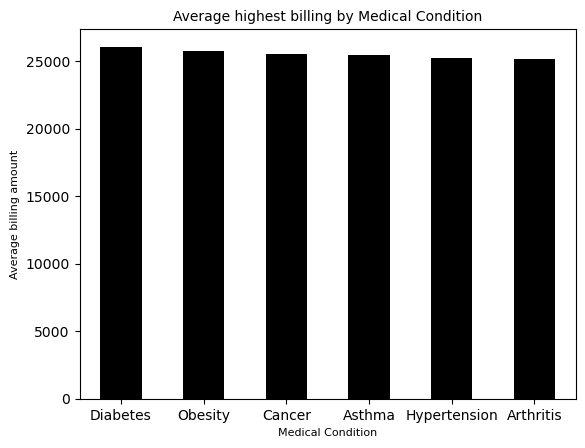

In [26]:
#which medical condition has the average highest billing
round(df1.groupby('Medical Condition')['Billing Amount'].mean(),2).sort_values(ascending= False).plot(kind='bar', color='k')
plt.title('Average highest billing by Medical Condition' , fontsize = 10) #default is 12
#xlabel
plt.xlabel('Medical Condition', fontsize= 8)
#ylabel
plt.ylabel('Average billing amount', fontsize= 8)
#rotate xticks
plt.xticks(rotation = 0);

In [30]:
order_of_bars=round(df1.groupby('Medical Condition')['Billing Amount'].mean(),2).sort_values(ascending= False).index

<Axes: xlabel='Medical Condition', ylabel='Billing Amount'>

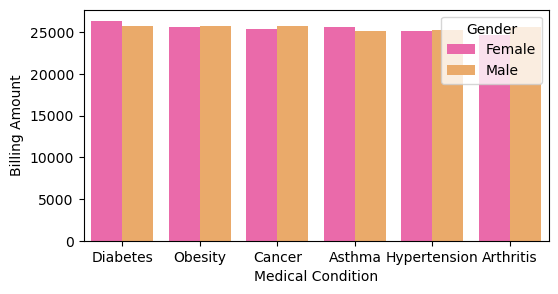

In [37]:
plt.figure(figsize = (6,3))
sns.barplot(x=df1['Medical Condition'], y=df1['Billing Amount'],hue=df1['Gender'],
            order= order_of_bars,
            palette='spring',
            errorbar=None)     #base on gender

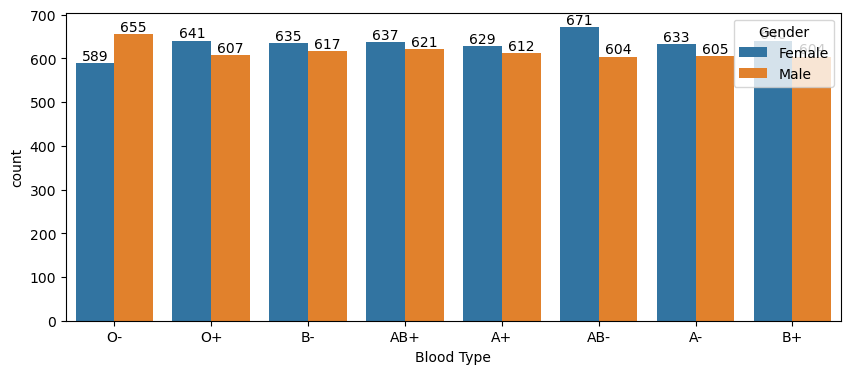

In [40]:
#show gender distribution by blood type
plt.figure(figsize= (10,4))
ax=sns.countplot(x=df1['Blood Type'], hue=df['Gender'])
for i in ax.containers:
  ax.bar_label(i,)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [44]:
df1['Date of Admission']= pd.to_datetime(df1['Date of Admission'])
df1['Discharge Date']= pd.to_datetime(df1['Discharge Date'])

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

In [47]:
df1['Year of Admission']= df1['Date of Admission'].dt.year
df1['Year of Discharge']= df1['Discharge Date'].dt.year

In [48]:
df1.head(2)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Year of Admission,Year of Discharge
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,2022,2022
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,2023,2023


In [49]:
df1['Year of Admission'].value_counts()

2021    2063
2020    2044
2022    2001
2019    1973
2023    1616
2018     303
Name: Year of Admission, dtype: int64

In [52]:
#total revenue by year ==>year of discharge by total billing amount
df1.groupby('Year of Discharge')['Billing Amount'].sum().sort_values(ascending=False)

Year of Discharge
2020    5.275087e+07
2021    5.261205e+07
2022    5.210693e+07
2019    4.975662e+07
2023    4.251913e+07
2018    5.422484e+06
Name: Billing Amount, dtype: float64

<Axes: xlabel='Year of Admission', ylabel='Billing Amount'>

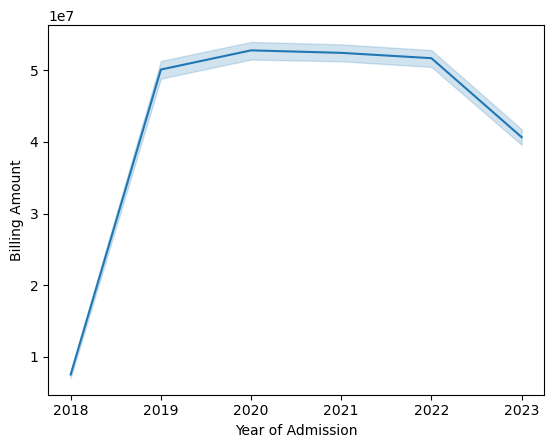

In [51]:
sns.lineplot(x=df1['Year of Admission'], y=df1['Billing Amount'], estimator=sum)